# TP 1 - 2C 2018
# GRUPO 11
# ANALISIS EXPLORATORIO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import datetime as DT
import calendar # idem


from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

%matplotlib inline

In [2]:
df_eventos = pd.read_csv('./data/events.csv',low_memory=False)


In [3]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]
#     return fecha.dt.weekday_name

def model_split(model):
    return model.str.split(' ', expand=True)


df_eventos['timestamp_fecha'] = pd.to_datetime(df_eventos['timestamp'], format='%Y-%m-%d')
df_eventos['timestamp_diaDelAnio'] = pd.to_datetime(df_eventos["timestamp_fecha"],format='%d/%m/%Y').dt.dayofyear
df_eventos['timestamp_diaDeLaSemana'] = pd.to_datetime(df_eventos["timestamp_fecha"],format='%d/%m/%Y').dt.dayofweek
df_eventos['timestamp_diaDeLaSemana_desc'] =df_eventos['timestamp_fecha'].map(fecha_a_dia)
##df_eventos['model_marca'] =df_eventos['model'].str.split(' ', expand=True)
#df_eventos['model_marca'] =df_eventos.model.str.split(" ")
df_eventos['model_marca'] =df_eventos.model.str.strip().str.split(' ', expand=True)[0]
df_eventos['model_tipo'] =df_eventos.model.str.strip().str.split(' ', expand=True)[1]
df_eventos['model_subtipo'] =df_eventos.model.str.strip().str.split(' ', expand=True)[2]


#s2.str.split('_', expand=True)
#dayofweek

In [4]:
df_eventos.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,screen_resolution,operating_system_version,browser_version,timestamp_fecha,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,model_marca,model_tipo,model_subtipo
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2018-05-31 23:38:05,151,3,Thursday,NaN,None,None
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,151,3,Thursday,NaN,None,None
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,2018-05-31 23:38:09,151,3,Thursday,iPhone,5s,None
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,2018-05-31 23:38:40,151,3,Thursday,iPhone,5s,None
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,2018-05-29 13:29:25,149,1,Tuesday,Samsung,Galaxy,S8
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360x640,Android 5.1.1,Android 5.1,2018-05-29 13:29:26,149,1,Tuesday,NaN,None,None
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2018-05-29 13:29:27,149,1,Tuesday,NaN,None,None
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,2018-05-29 13:29:35,149,1,Tuesday,Samsung,Galaxy,S8
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,2018-04-09 20:12:31,99,0,Monday,NaN,None,None
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1920x1080,Windows 10,Chrome 65.0,2018-04-09 20:12:31,99,0,Monday,NaN,None,None


# Vista general del dataset

In [5]:
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 30 columns):
timestamp                       1011288 non-null object
event                           1011288 non-null object
person                          1011288 non-null object
url                             82756 non-null object
sku                             563838 non-null object
model                           564284 non-null object
condition                       563836 non-null object
storage                         563836 non-null object
color                           563836 non-null object
skus                            221699 non-null object
search_term                     48967 non-null object
staticpage                      3598 non-null object
campaign_source                 82796 non-null object
search_engine                   50957 non-null object
channel                         87378 non-null object
new_vs_returning                87378 non-null object
city        

In [6]:
df_eventos.describe()

,timestamp_diaDelAnio,timestamp_diaDeLaSemana
count,1.011288e+06,1.011288e+06
mean,1.305900e+02,2.734204e+00
std,3.206092e+01,1.897364e+00
min,1.000000e+00,0.000000e+00
25%,1.200000e+02,1.000000e+00
50%,1.400000e+02,3.000000e+00
75%,1.530000e+02,4.000000e+00
max,1.660000e+02,6.000000e+00


In [7]:
df_eventos.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,screen_resolution,operating_system_version,browser_version,timestamp_fecha,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,model_marca,model_tipo,model_subtipo
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2018-05-31 23:38:05,151,3,Thursday,NaN,None,None
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,151,3,Thursday,NaN,None,None
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,2018-05-31 23:38:09,151,3,Thursday,iPhone,5s,None
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,2018-05-31 23:38:40,151,3,Thursday,iPhone,5s,None
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,2018-05-29 13:29:25,149,1,Tuesday,Samsung,Galaxy,S8
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360x640,Android 5.1.1,Android 5.1,2018-05-29 13:29:26,149,1,Tuesday,NaN,None,None
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2018-05-29 13:29:27,149,1,Tuesday,NaN,None,None
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,2018-05-29 13:29:35,149,1,Tuesday,Samsung,Galaxy,S8
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,2018-04-09 20:12:31,99,0,Monday,NaN,None,None
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1920x1080,Windows 10,Chrome 65.0,2018-04-09 20:12:31,99,0,Monday,NaN,None,None


In [8]:
print(df_eventos['event'].unique())

['ad campaign hit' 'visited site' 'viewed product' 'checkout'
 'generic listing' 'search engine hit' 'brand listing' 'searched products'
 'conversion' 'staticpage' 'lead']


In [9]:
print(df_eventos['country'].unique())

[nan 'Brazil' 'Unknown' 'United States' 'Argentina' 'Russia' 'Canada'
 'Netherlands' 'France' 'Paraguay' 'Mexico' 'Mozambique' 'Philippines'
 'Israel' 'Bangladesh' 'Italy' 'United Kingdom' 'Angola' 'Portugal'
 'Uzbekistan' 'Venezuela' 'Belize' 'Colombia' 'China' 'French Guiana'
 'Algeria' 'Japan' 'India' 'Dominican Republic' 'Ireland' 'Zimbabwe'
 'Turkey' 'Germany' 'Sri Lanka' 'Rwanda' 'Romania' 'Saudi Arabia' 'Morocco'
 'Uruguay' 'Switzerland' 'Cape Verde' 'Denmark' 'Peru' 'Guadeloupe'
 'Poland' 'South Africa' 'Spain']


In [10]:
print(df_eventos['model'].unique())

[nan 'iPhone 5s' 'Samsung Galaxy S8' 'Motorola Moto Z Play' 'iPhone 7 Plus'
 'iPhone 6S' 'iPhone 4G' 'iPhone 4S' 'Samsung Galaxy J5' 'iPhone 5c'
 'iPhone 7' 'iPhone 6' 'Samsung Galaxy S6 Flat' 'Motorola Moto G3 4G'
 'Motorola Moto G4 Play DTV' 'Asus Zenfone 2' 'iPhone 5'
 'Motorola Moto X Play 4G Dual' 'Motorola Moto X2' 'Samsung Galaxy A7 2016'
 'iPhone 6S Plus' 'Samsung Galaxy Core Plus Duos TV'
 'Samsung Galaxy Win Duos' 'Samsung Galaxy S7' 'Samsung Galaxy Core 2 Duos'
 'Samsung Galaxy J7' 'Quantum GO 4G' 'Lenovo Vibe A7010 Dual Chip'
 'Sony Xperia M4 Aqua' 'Motorola Moto G4 Plus'
 'Samsung Galaxy J7 2016 Metal' 'Samsung Galaxy J1 2016' 'Lenovo Vibe K5'
 'Motorola Moto G2 3G Dual' 'Samsung Galaxy Y Duos'
 'Motorola Moto G2 4G Dual' 'Sony Xperia M4 Aqua Dual' 'Samsung Galaxy S5'
 'Motorola Moto Z2 Play' 'Motorola Moto MAXX ' 'Motorola Moto X Force'
 'Samsung Galaxy S7 Edge' 'Sony Xperia Z3 Plus' 'Sony Xperia Z3 Dual'
 'LG G4 H815P' 'LG G4 H818P' 'Samsung Galaxy S6 Edge' 'iPhone 6 Plu

In [11]:
#limpieza de datos
df_eventos.dropna(subset = ['model','country']) 

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,screen_resolution,operating_system_version,browser_version,timestamp_fecha,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,model_marca,model_tipo,model_subtipo


In [12]:
df_eventos.loc[:,'total']=1 #evita mensaje  SettingWithCopyWarning:
df_eventos_groupby_model = df_eventos.groupby(['model_marca']).sum()
df_eventos_groupby_model = df_eventos_groupby_model[['total']].reset_index()
df_eventos_groupby_model.set_index('model_marca', inplace=True)
df_eventos_groupby_model = df_eventos_groupby_model.sort_values('total', ascending=False)

In [13]:
df_eventos_groupby_model

,total
model_marca,
iPhone,256585
Samsung,218127
Motorola,63518
LG,9724
Sony,7025
Lenovo,4779
Asus,2091
iPad,1914
Quantum,520


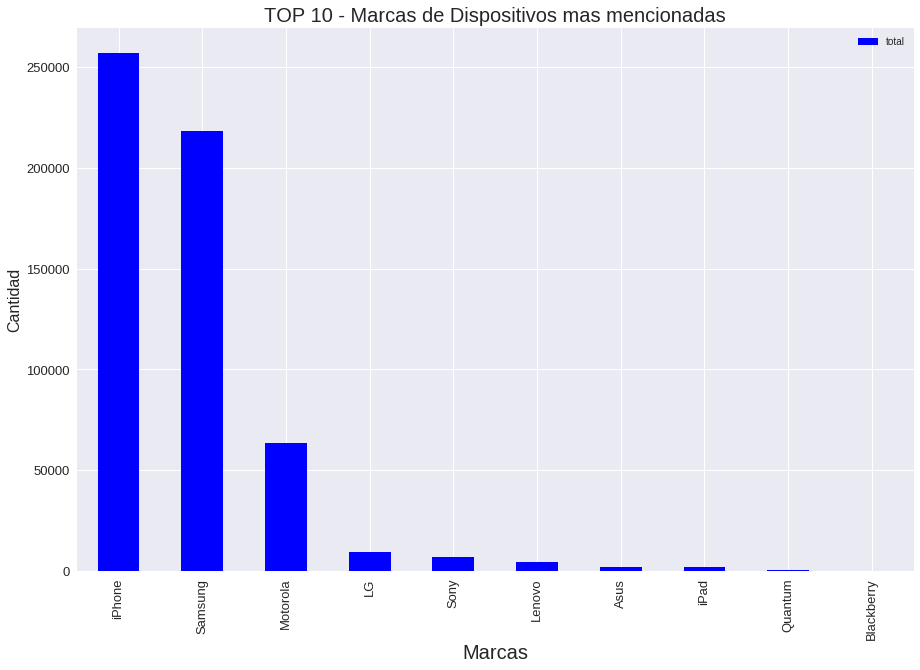

In [14]:
df_eventos_groupby_model.head(10).plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['blue'], fontsize=13)
plt.title('TOP 10 - Marcas de Dispositivos mas mencionadas', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Marcas', fontsize=20);

Comenzaremos analizando algunos datos generales del listado, en este caso las marcas más representantivas del set de datos. Es clara la importancia tanto de de Apple como Samsnung como lideres del sector, seguido por Motorola. Las restantes marcas tiene una presencia menos importante.

# Paises desde donde se accede a Trocafone.

In [15]:
df_eventos_groupby_country = df_eventos.groupby(['country']).sum()
df_eventos_groupby_country = df_eventos_groupby_country[['total']].reset_index()
df_eventos_groupby_country.set_index('country', inplace=True)

In [16]:
df_eventos_groupby_country.sort_values('total', ascending=False)

,total
country,
Brazil,84308
Unknown,2313
United States,465
Argentina,94
Canada,35
Netherlands,13
France,13
Mozambique,12
United Kingdom,12


In [17]:
df_eventos_groupby_country_top5 = df_eventos_groupby_country.sort_values('total', ascending=False).head(5)
df_eventos_groupby_country_top5

,total
country,
Brazil,84308
Unknown,2313
United States,465
Argentina,94
Canada,35


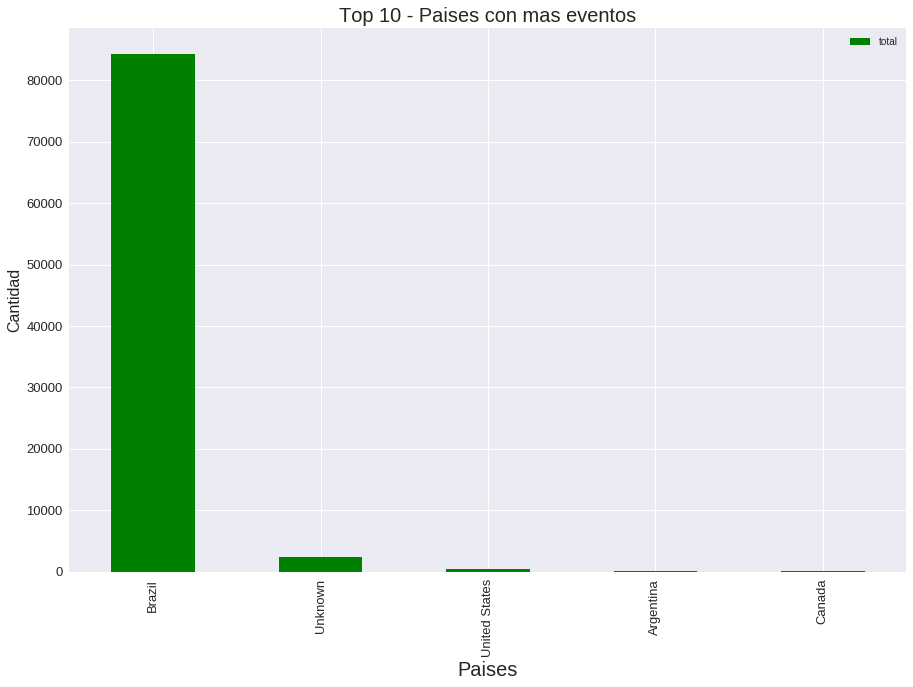

In [18]:
df_eventos_groupby_country_top5.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Paises con mas eventos', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Paises', fontsize=20);

Como primera observación vemos que la fuente de datos es principalmente Brasil, es de donde surge la principal operatoria de la empresa. Hay también un porcentaje pequeño que no conoce el origen. Es muy amplia la diferencia a favor de Brasil por lo tanto no se elimina ya que una analisis inicial. Luego siguen (y muy por debajo) Estados Unidos, Argentina y Canada.

In [19]:
df_eventos_groupby_person = df_eventos.groupby(['person']).sum()
df_eventos_groupby_person = df_eventos_groupby_person[['total']].reset_index()
df_eventos_groupby_person.set_index('person', inplace=True)

In [20]:
df_eventos_groupby_person_top10 = df_eventos_groupby_person.sort_values('total', ascending=False).head(10)
df_eventos_groupby_person_top10

,total
person,
71492f2b,2771
6b07be7b,2770
285101a1,2140
3e34b3cf,1877
2d5a84c1,1800
5f25cb5d,1797
5af7e2bc,1773
3b5a5833,1705
d7e60792,1352


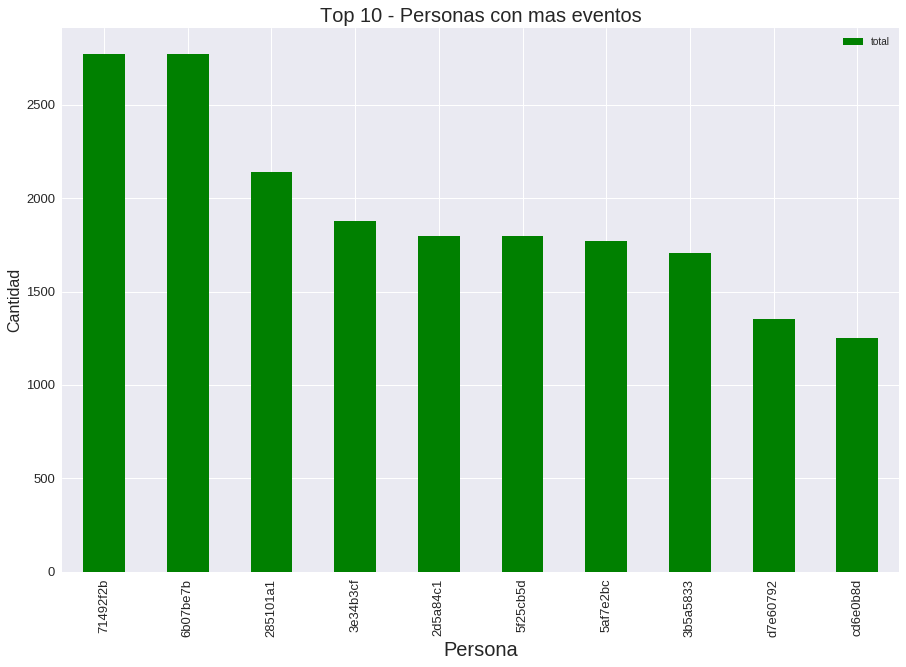

In [21]:
df_eventos_groupby_person_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Personas con mas eventos', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Persona', fontsize=20);

In [22]:
df_eventos[df_eventos['person']=='71492f2b']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,operating_system_version,browser_version,timestamp_fecha,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,model_marca,model_tipo,model_subtipo,total
433894,2018-01-06 01:09:54,visited site,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Windows 10,Chrome 63.0,2018-01-06 01:09:54,6,5,Saturday,NaN,None,None,1
433895,2018-01-06 01:10:13,generic listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"10170,10114,10155,3853,9958,7141,7155,7097,707...",...,NaN,NaN,2018-01-06 01:10:13,6,5,Saturday,NaN,None,None,1
433896,2018-01-06 01:12:17,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"9146,6454,3169,5425,7575",...,NaN,NaN,2018-01-06 01:12:17,6,5,Saturday,NaN,None,None,1
433897,2018-01-06 01:12:42,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"9146,5425,7575",...,NaN,NaN,2018-01-06 01:12:42,6,5,Saturday,NaN,None,None,1
433898,2018-01-06 01:13:02,viewed product,71492f2b,NaN,7575.0,LG G4 H815P,Bom,32GB,Titânio,NaN,...,NaN,NaN,2018-01-06 01:13:02,6,5,Saturday,LG,G4,H815P,1
433899,2018-01-06 01:15:49,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"2915,9496,5219,9552,9538,2952,3035,11821,9510,...",...,NaN,NaN,2018-01-06 01:15:49,6,5,Saturday,NaN,None,None,1
433900,2018-01-06 01:16:05,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"2915,5219,2952,3035",...,NaN,NaN,2018-01-06 01:16:05,6,5,Saturday,NaN,None,None,1
433901,2018-01-06 01:16:14,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"2915,3035",...,NaN,NaN,2018-01-06 01:16:14,6,5,Saturday,NaN,None,None,1
433902,2018-01-06 01:16:33,viewed product,71492f2b,NaN,9454.0,Samsung Galaxy A7 2016,Bom,16GB,Dourado,NaN,...,NaN,NaN,2018-01-06 01:16:33,6,5,Saturday,Samsung,Galaxy,A7,1
433903,2018-01-06 01:16:38,viewed product,71492f2b,NaN,9398.0,Samsung Galaxy A5 2016,Bom,16GB,Preto,NaN,...,NaN,NaN,2018-01-06 01:16:38,6,5,Saturday,Samsung,Galaxy,A5,1


In [23]:
df_eventos[df_eventos['person']=='71492f2b']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,operating_system_version,browser_version,timestamp_fecha,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,model_marca,model_tipo,model_subtipo,total
433894,2018-01-06 01:09:54,visited site,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Windows 10,Chrome 63.0,2018-01-06 01:09:54,6,5,Saturday,NaN,None,None,1
433895,2018-01-06 01:10:13,generic listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"10170,10114,10155,3853,9958,7141,7155,7097,707...",...,NaN,NaN,2018-01-06 01:10:13,6,5,Saturday,NaN,None,None,1
433896,2018-01-06 01:12:17,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"9146,6454,3169,5425,7575",...,NaN,NaN,2018-01-06 01:12:17,6,5,Saturday,NaN,None,None,1
433897,2018-01-06 01:12:42,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"9146,5425,7575",...,NaN,NaN,2018-01-06 01:12:42,6,5,Saturday,NaN,None,None,1
433898,2018-01-06 01:13:02,viewed product,71492f2b,NaN,7575.0,LG G4 H815P,Bom,32GB,Titânio,NaN,...,NaN,NaN,2018-01-06 01:13:02,6,5,Saturday,LG,G4,H815P,1
433899,2018-01-06 01:15:49,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"2915,9496,5219,9552,9538,2952,3035,11821,9510,...",...,NaN,NaN,2018-01-06 01:15:49,6,5,Saturday,NaN,None,None,1
433900,2018-01-06 01:16:05,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"2915,5219,2952,3035",...,NaN,NaN,2018-01-06 01:16:05,6,5,Saturday,NaN,None,None,1
433901,2018-01-06 01:16:14,brand listing,71492f2b,NaN,NaN,NaN,NaN,NaN,NaN,"2915,3035",...,NaN,NaN,2018-01-06 01:16:14,6,5,Saturday,NaN,None,None,1
433902,2018-01-06 01:16:33,viewed product,71492f2b,NaN,9454.0,Samsung Galaxy A7 2016,Bom,16GB,Dourado,NaN,...,NaN,NaN,2018-01-06 01:16:33,6,5,Saturday,Samsung,Galaxy,A7,1
433903,2018-01-06 01:16:38,viewed product,71492f2b,NaN,9398.0,Samsung Galaxy A5 2016,Bom,16GB,Preto,NaN,...,NaN,NaN,2018-01-06 01:16:38,6,5,Saturday,Samsung,Galaxy,A5,1


In [24]:
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 31 columns):
timestamp                       1011288 non-null object
event                           1011288 non-null object
person                          1011288 non-null object
url                             82756 non-null object
sku                             563838 non-null object
model                           564284 non-null object
condition                       563836 non-null object
storage                         563836 non-null object
color                           563836 non-null object
skus                            221699 non-null object
search_term                     48967 non-null object
staticpage                      3598 non-null object
campaign_source                 82796 non-null object
search_engine                   50957 non-null object
channel                         87378 non-null object
new_vs_returning                87378 non-null object
city        

## 3. Ventas por Marca y Modelo

En esta etapa se analizaron las relaciones entre las ventas de los productos y los usuarios

### 3.1 Ventas por usuario

In [25]:
df_eventos_checkout = df_eventos[df_eventos['event']=='checkout']
df_eventos_checkout

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,operating_system_version,browser_version,timestamp_fecha,timestamp_diaDelAnio,timestamp_diaDeLaSemana,timestamp_diaDeLaSemana_desc,model_marca,model_tipo,model_subtipo,total
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,2018-05-31 23:38:40,151,3,Thursday,iPhone,5s,None,1
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,2018-05-29 13:29:35,149,1,Tuesday,Samsung,Galaxy,S8,1
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,12660.0,Motorola Moto Z Play,Bom,32GB,Preto,NaN,...,NaN,NaN,2018-05-24 11:34:32,144,3,Thursday,Motorola,Moto,Z,1
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,6355.0,Samsung Galaxy J5,Excelente,16GB,Preto,NaN,...,NaN,NaN,2018-04-06 05:14:58,96,4,Friday,Samsung,Galaxy,J5,1
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,6355.0,Samsung Galaxy J5,Excelente,16GB,Preto,NaN,...,NaN,NaN,2018-04-06 05:18:15,96,4,Friday,Samsung,Galaxy,J5,1
94,2018-05-04 18:50:21,checkout,00184bf9,NaN,213.0,iPhone 5c,Muito Bom,16GB,Branco,NaN,...,NaN,NaN,2018-05-04 18:50:21,124,4,Friday,iPhone,5c,None,1
95,2018-05-17 04:45:15,checkout,00184bf9,NaN,3649.0,iPhone 5c,Excelente,8GB,Branco,NaN,...,NaN,NaN,2018-05-17 04:45:15,137,3,Thursday,iPhone,5c,None,1
103,2018-05-17 00:11:26,checkout,0019c395,NaN,6356.0,Samsung Galaxy J5,Muito Bom,16GB,Preto,NaN,...,NaN,NaN,2018-05-17 00:11:26,137,3,Thursday,Samsung,Galaxy,J5,1
110,2018-06-08 12:19:50,checkout,001bb7eb,NaN,2836.0,iPhone 6,Bom,128GB,Cinza espacial,NaN,...,NaN,NaN,2018-06-08 12:19:50,159,4,Friday,iPhone,6,None,1
114,2018-05-29 12:56:27,checkout,001f1653,NaN,3359.0,Samsung Galaxy S6 Flat,Bom,32GB,Preto,NaN,...,NaN,NaN,2018-05-29 12:56:27,149,1,Tuesday,Samsung,Galaxy,S6,1


In [26]:
df_eventos_groupby_event_checkout = df_eventos_checkout.groupby(['model']).sum()
df_eventos_groupby_event_checkout = df_eventos_groupby_event_checkout[['total']].reset_index()
df_eventos_groupby_event_checkout.set_index('model', inplace=True)

In [27]:
df_eventos_groupby_checkout_top10 = df_eventos_groupby_event_checkout.sort_values('total', ascending=False).head(10)
df_eventos_groupby_checkout_top10

,total
model,
iPhone 6,3295
iPhone 5s,2744
iPhone 6S,2308
Samsung Galaxy J5,1918
Samsung Galaxy S7,1234
iPhone 7,1205
Samsung Galaxy S8,1074
iPhone 7 Plus,924
Samsung Galaxy J7 Prime,866


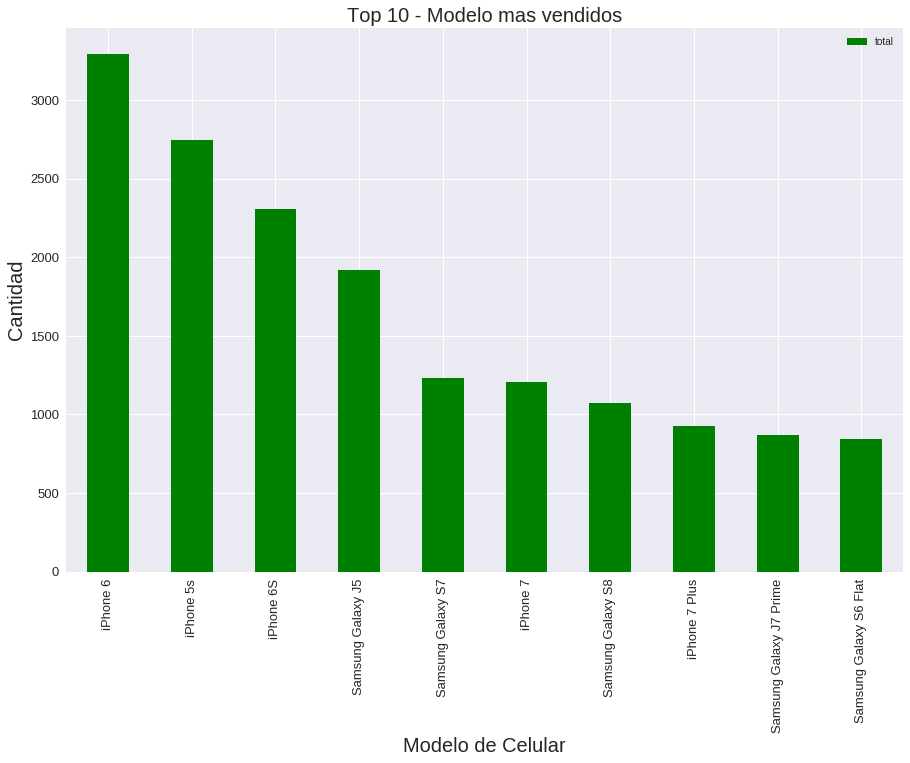

In [35]:
df_eventos_groupby_checkout_top10.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['green'], fontsize=13)
plt.title('Top 10 - Modelo mas vendidos', fontsize=20);
plt.ylabel('Cantidad', fontsize=20);
plt.xlabel('Modelo de Celular', fontsize=20);

Vemos que predomina en los primeros 10 tanto Apple como Samsung como marcas favoritas al momento de elegir un producto.

### 3.2 Marcas más vendidas 

In [29]:
df_eventos_groupby_event_checkout_marca = df_eventos_checkout.groupby(['model_marca']).sum()
df_eventos_groupby_event_checkout_marca = df_eventos_groupby_event_checkout_marca[['total']].reset_index()
df_eventos_groupby_event_checkout_marca.set_index('model_marca', inplace=True)

In [30]:
df_eventos_groupby_checkout_marca_top5 = df_eventos_groupby_event_checkout_marca.sort_values('total', ascending=False).head(5)
df_eventos_groupby_checkout_marca_top5

,total
model_marca,
Samsung,14707
iPhone,14082
Motorola,3738
LG,562
Lenovo,272


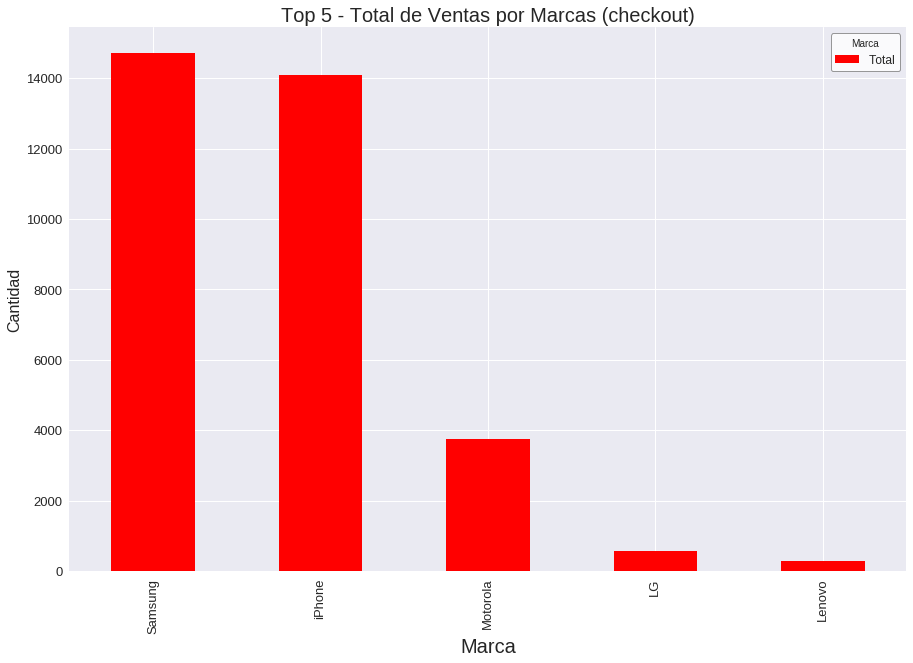

In [38]:
df_eventos_groupby_checkout_marca_top5.plot(kind='bar',stacked=True, rot=90, figsize=(15,10),color=['red'], fontsize=13)
plt.title('Top 5 - Total de Ventas por Marcas (checkout)', fontsize=20);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Marca', fontsize=20);
leyenda=plt.legend(['Total'],fontsize=12,title='Marca',frameon=True,facecolor='white',edgecolor='gray')
leyenda.get_frame().set_linewidth(1.0)

Aca encontramos como primer insigth que si bien los primeros 3 modelos más vendidos son de Apple, en cantidad total de ventas, Samsung supera a su rival directo Apple. Uno de los opciones sea la variedad de modelos de Samsung vs los ofrecidos por Apple

In [68]:
df_eventos_groupby_event_checkout_dia = df_eventos_checkout.groupby(['model_marca','timestamp_diaDeLaSemana_desc','timestamp_diaDeLaSemana']).sum()
df_eventos_groupby_event_checkout_dia = df_eventos_groupby_event_checkout_dia[['total']].reset_index()
df_eventos_groupby_event_checkout_dia.set_index('timestamp_diaDeLaSemana_desc','timestamp_diaDeLaSemana', inplace=True)

In [69]:
df_eventos_groupby_event_checkout_dia.sort_values(['timestamp_diaDeLaSemana','total'], ascending=False).head(20)

,model_marca,timestamp_diaDeLaSemana,total
timestamp_diaDeLaSemana_desc,,,
Sunday,Samsung,6,1432
Sunday,iPhone,6,1337
Sunday,Motorola,6,265
Sunday,LG,6,48
Sunday,Lenovo,6,26
Sunday,Sony,6,20
Sunday,Quantum,6,4
Sunday,iPad,6,3
Sunday,Asus,6,2


In [78]:
df_eventos_groupby_event_checkout_dia[df_eventos_groupby_event_checkout_dia['model_marca']=='Samsung'].sort_values('timestamp_diaDeLaSemana', ascending=True).head(100)

,model_marca,timestamp_diaDeLaSemana,total
timestamp_diaDeLaSemana_desc,,,
Monday,Samsung,0,2074
Tuesday,Samsung,1,2502
Wednesday,Samsung,2,2517
Thursday,Samsung,3,2391
Friday,Samsung,4,2287
Saturday,Samsung,5,1504
Sunday,Samsung,6,1432


In [97]:
df_eventos_groupby_event_checkout_dia2 = df_eventos_groupby_event_checkout_dia.reset_index()
df_eventos_groupby_event_checkout_dia2

,timestamp_diaDeLaSemana_desc,model_marca,timestamp_diaDeLaSemana,total
0,Friday,Asus,4,13
1,Monday,Asus,0,9
2,Saturday,Asus,5,8
3,Sunday,Asus,6,2
4,Thursday,Asus,3,14
5,Tuesday,Asus,1,6
6,Wednesday,Asus,2,11
7,Friday,LG,4,85
8,Monday,LG,0,98
9,Saturday,LG,5,55


In [98]:
top_df_eventos_groupby_event_checkout_dia2_2 = pd.pivot_table(df_eventos_groupby_event_checkout_dia2,values=['total'],
               columns='model_marca',aggfunc=np.sum,fill_value=0)
top_df_eventos_groupby_event_checkout_dia2_2

model_marca,Asus,LG,Lenovo,Motorola,Quantum,Samsung,Sony,iPad,iPhone
total,63,562,272,3738,19,14707,218,72,14082
